<a href="https://colab.research.google.com/github/dwdsuh/OMOS/blob/master/Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualization


In this page I am going to explore how to make best out of matplotlib and seaborn to be a competent data scientist. 

I will follow the instruction step by step.

check https://towardsdatascience.com/a-step-by-step-guide-for-creating-advanced-python-data-visualizations-with-seaborn-matplotlib-1579d6a1a7d0 for further information!

##Takeaways


1. how to draw plot as an object. 

    use ax,fig=plt.subplots(figsize=(7,7))
    
2. how to use GridSpec

3. Slicing pd.DataFrame using groupby, agg, reset_index

4. how to manipulate pd.Series using values_count, reindex

## Two different Matplotlib Interfaces

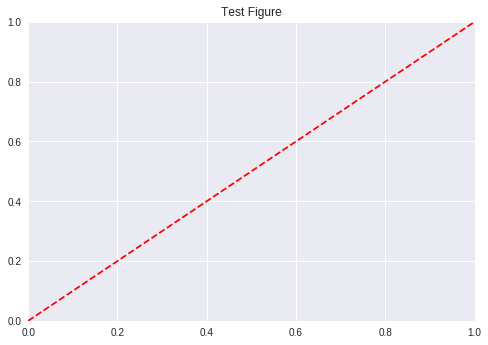

In [0]:
##1 simple way

import matplotlib.pyplot as plt

plt.figure()
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Test Figure')
plt.show()

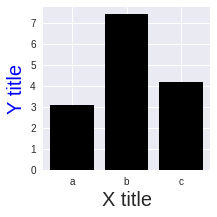

In [0]:
##2 object-oriented method

fig, ax=plt.subplots(figsize=(3,3))
ax.bar(x=['a','b','c'], height=[3.1,7.4,4.2], color='black')
ax.set_xlabel(xlabel='X title', size=20)
ax.set_ylabel(ylabel="Y title", size=20, color='b')
plt.show()


In [0]:
##2D KD plots

import numpy as np
import seaborn as sns

np.random.seed(1)
numerical_1=np.random.randn(100)
np.random.seed(2)
numerical_2=np.random.randn(100)

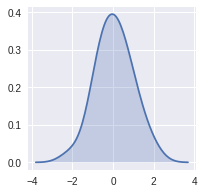

In [0]:
fig, ax=plt.subplots(figsize=(3,3))
sns.kdeplot(data=numerical_1,
          # data2=numerical_2,
           ax=ax,  ##이게 핵심!!
           shade=1,
           bw=0.5,
           vertical=0,
           legend=1
           )
           
plt.show()

In [0]:
##heat map

import pandas as pd

df = pd.DataFrame(dict(categorical_1=['apple', 'banana', 'grapes',
                                      'apple', 'banana', 'grapes',
                                      'apple', 'banana', 'grapes'], 
                  categorical_2=['A','A','A','B','B','B','C','C','C'], 
                  value=[10,2,5,7,3,15,1,6,8]))
pivot_table = df.pivot("categorical_1", "categorical_2", "value")


In [0]:
df

,categorical_1,categorical_2,value
0,apple,A,10
1,banana,A,2
2,grapes,A,5
3,apple,B,7
4,banana,B,3
5,grapes,B,15
6,apple,C,1
7,banana,C,6
8,grapes,C,8


In [0]:
pivot_table
pivot_table.shape

np.array([[1,2,3]]*3).shape

(3, 3)

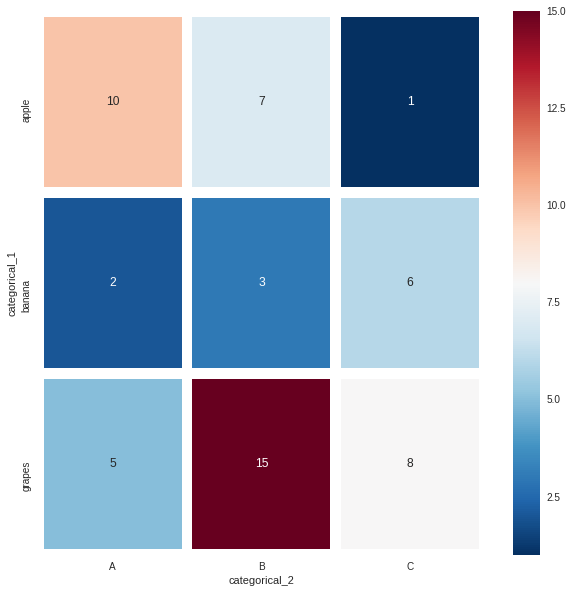

In [0]:
fig, ax=plt.subplots(figsize=(10,10))
sns.heatmap(data=pivot_table, 
         #   cmap=sns.color_palette('Blues'),
           ax=ax, 
           annot=True,
           linewidths=10,
           cbar=1,
           square=0,
           center=8,
            
           )

plt.show()

##Increase the dimension of plots

In [0]:
#1. overlay plots

import seaborn as sns

fig, ax=plt.subplots(figsize=(4,4))
sns.lineplot(x=['A','B','C','D'], 
             y=[4,2,5,3],
             color='r',
             ax=ax) ##이게 핵심!! 객체 지향!! 객체지향!! 객체 지향!!
sns.lineplot(x=['A','B','C','D'], 
             y=[1,6,2,4], 
             color='b',
             ax=ax)    
ax.legend(['alpha', 'beta'], facecolor='w')
plt.show()

##says seaborn has no module 'lineplot'
##seaborn needs upgrade!!

In [0]:
!pip show seaborn

Name: seaborn
Version: 0.9.0
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: /usr/local/lib/python3.6/dist-packages
Requires: pandas, scipy, numpy, matplotlib
Required-by: stable-baselines, missingno


In [0]:
!pip ungrade seaborn

ERROR: unknown command "ungrade"


In [1]:
!pip install seaborn==0.9.0

    100% |████████████████████████████████| 215kB 26.5MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


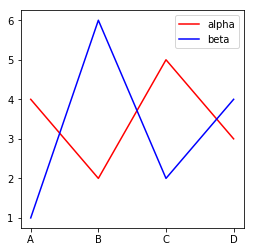

In [0]:
#1. overlay plots

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax=plt.subplots(figsize=(4,4))
sns.lineplot(x=['A','B','C','D'], 
             y=[4,2,5,3],
             color='r',
             ax=ax) ##이게 핵심!! 객체 지향!! 객체지향!! 객체 지향!!
sns.lineplot(x=['A','B','C','D'], 
             y=[1,6,2,4], 
             color='b',
             ax=ax)    
ax.legend(['alpha', 'beta'], facecolor='w')
plt.show()


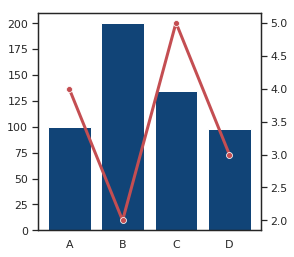

In [0]:
sns.set(style="white", rc={"lines.linewidth": 3})
fig, ax1 = plt.subplots(figsize=(4,4))
ax2 = ax1.twinx()
sns.barplot(x=['A','B','C','D'],
            y=[100,200,135,98], 
            color='#004488',
            ax=ax1)
sns.lineplot(x=['A','B','C','D'], 
             y=[4,2,5,3],
             color='r',
             marker="o",
             ax=ax2)
plt.show()
sns.set()

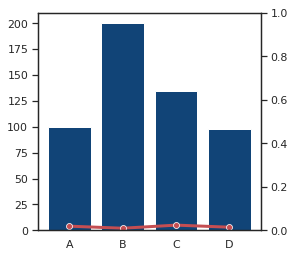

In [0]:
##the reason the code above made ax2 is because:

sns.set(style="white", rc={"lines.linewidth": 3})
fig, ax1 = plt.subplots(figsize=(4,4))
ax2 = ax1.twinx()
sns.barplot(x=['A','B','C','D'],
            y=[100,200,135,98], 
            color='#004488',
            ax=ax1)
sns.lineplot(x=['A','B','C','D'], 
             y=[4,2,5,3],
             color='r',
             marker="o",
             ax=ax1)
plt.show()
sns.set()

##those two plots have different y-axis

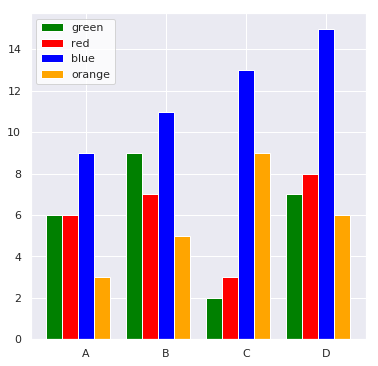

In [0]:
import numpy as np

categorical_1 = ['A', 'B', 'C', 'D']
colors        = ['green', 'red', 'blue', 'orange']
numerical = [[6, 9, 2, 7],
             [6, 7, 3, 8],
             [9, 11, 13, 15],
             [3, 5, 9, 6]]
number_groups = len(categorical_1) 
bin_width = 1.0/(number_groups+1)
fig, ax = plt.subplots(figsize=(6,6))

for i in range(number_groups):  ##[0,1,2,3]
    ax.bar(x=np.arange(len(categorical_1)) + i*bin_width, 
           height=numerical[i],
           width=bin_width,
           color=colors[i],
           align='center')
    
    
ax.set_xticks(np.arange(len(categorical_1)) + number_groups/(2*(number_groups+1)))
# number_groups/(2*(number_groups+1)): offset of xticklabel
ax.set_xticklabels(categorical_1)
ax.legend(colors, facecolor='w')
plt.show()

<Figure size 432x288 with 0 Axes>

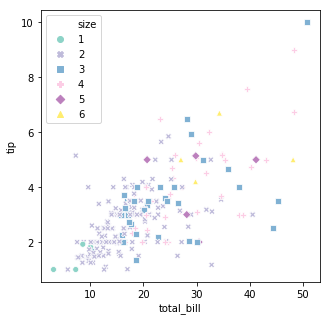

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
tips = sns.load_dataset("tips")
plt.figure()
fig, ax=plt.subplots(figsize=(5,5))
ax = sns.scatterplot(x="total_bill", y="tip",                      
                     hue="size", #hue_order=[1,14,465,23,54,34],
                     style='size',
                     #hue_norm=(0, 7),
                     palette='Set3',
                     legend="full", data=tips)
plt.show()

In [2]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


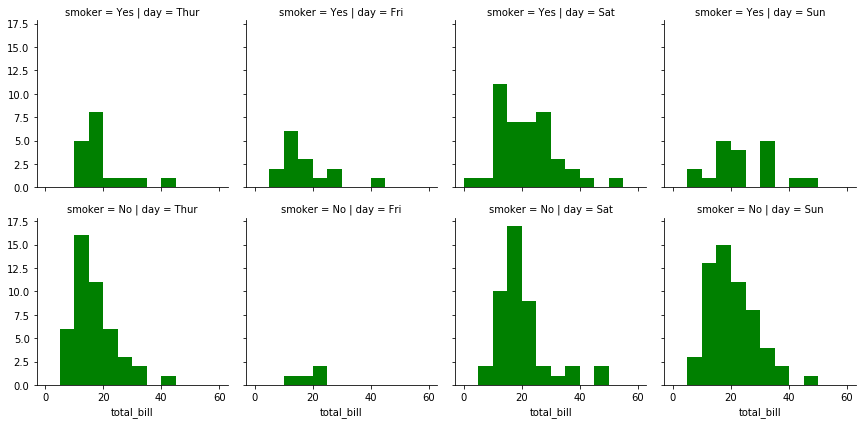

In [13]:
import numpy as np
bins = np.arange(0, 65, 5)
g = sns.FacetGrid(tips, col="day",  row="smoker")
g = g.map(plt.hist, "total_bill", bins=bins, color="g")

## Partition the figure with GridSpec

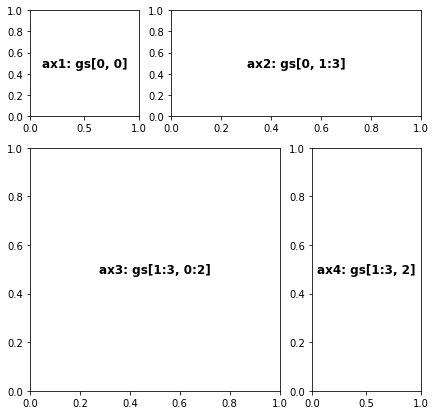

In [37]:
from matplotlib import gridspec
fig = plt.figure(figsize=(7,7))
gs = gridspec.GridSpec(nrows=3, 
                       ncols=3, 
                       figure=fig, 
                       width_ratios= [1, 1, 1],
                       height_ratios=[1, 1, 1],
                       wspace=0.3,
                       hspace=0.3)
ax1 = fig.add_subplot(gs[0, 0])
ax1.text(0.5, 0.5, 'ax1: gs[0, 0]', fontsize=12, fontweight="bold", va="center", ha="center")  # adding text to ax1
ax2 = fig.add_subplot(gs[0, 1:3])
ax2.text(0.5, 0.5, 'ax2: gs[0, 1:3]', fontsize=12, fontweight="bold", va="center", ha="center")
ax3 = fig.add_subplot(gs[1:3, 0:2])
ax3.text(0.5, 0.5, 'ax3: gs[1:3, 0:2]', fontsize=12, fontweight="bold", va="center", ha="center")
ax4 = fig.add_subplot(gs[1:3, 2])
ax4.text(0.5, 0.5, 'ax4: gs[1:3, 2]', fontsize=12, fontweight="bold", va="center", ha="center")
plt.show()

In [0]:
import zipfile
with zipfile.ZipFile('BlackFriday.csv.zip', 'r') as f:
  f.extractall()

In [4]:
import pandas as pd
import numpy as np

df=pd.read_csv('BlackFriday.csv', usecols=['User_ID', 'Gender', 'Age', 'Purchase'])
df.head()

,User_ID,Gender,Age,Purchase
0,1000001,F,0-17,8370
1,1000001,F,0-17,15200
2,1000001,F,0-17,1422
3,1000001,F,0-17,1057
4,1000002,M,55+,7969


In [10]:
df_gp_10=df[['User_ID', 'Purchase']].groupby('User_ID')#.agg(np.mean).reset_index()
df_gp_10.head()

,User_ID,Purchase
0,1000001,8370
1,1000001,15200
2,1000001,1422
3,1000001,1057
4,1000002,7969
5,1000003,15227
6,1000004,19215
7,1000004,15854
8,1000004,15686
9,1000005,7871


In [8]:
df_gp_1=df[['User_ID', 'Purchase']].groupby('User_ID').agg(np.mean).reset_index()
df_gp_1

,User_ID,Purchase
0,1000001,9808.264706
1,1000002,10662.539474
2,1000003,11780.517241
3,1000004,15845.153846
4,1000005,7745.292453
5,1000006,8248.913043
6,1000007,14651.687500
7,1000008,10480.855263
8,1000009,10420.350877
9,1000010,9772.459459


In [15]:
df_gp_2=df[['User_ID', 'Gender', 'Age']].groupby('User_ID').agg(max).reset_index()
df_gp_2

,User_ID,Gender,Age
0,1000001,F,0-17
1,1000002,M,55+
2,1000003,M,26-35
3,1000004,M,46-50
4,1000005,M,26-35
5,1000006,F,51-55
6,1000007,M,36-45
7,1000008,M,26-35
8,1000009,M,26-35
9,1000010,F,36-45


In [18]:
df_gp=df_gp_1.merge(df_gp_2, on=['User_ID'])
df_gp

,User_ID,Purchase,Gender,Age
0,1000001,9808.264706,F,0-17
1,1000002,10662.539474,M,55+
2,1000003,11780.517241,M,26-35
3,1000004,15845.153846,M,46-50
4,1000005,7745.292453,M,26-35
5,1000006,8248.913043,F,51-55
6,1000007,14651.687500,M,36-45
7,1000008,10480.855263,M,26-35
8,1000009,10420.350877,M,26-35
9,1000010,9772.459459,F,36-45


In [20]:
len(df_gp['Age'].unique())

7

In [90]:
freq=[df['Age'].value_counts()[i] for i in range(7)]
df['Age'].value_counts().reindex(index=age_list)



0-17      14707
18-25     97634
26-35    214690
36-45    107499
46-50     44526
51-55     37618
55+       20903
Name: Age, dtype: int64

In [92]:

freq=[df['Age'].value_counts().reindex(index=age_list)[i] for i in range(7)]
freq

[14707, 97634, 214690, 107499, 44526, 37618, 20903]

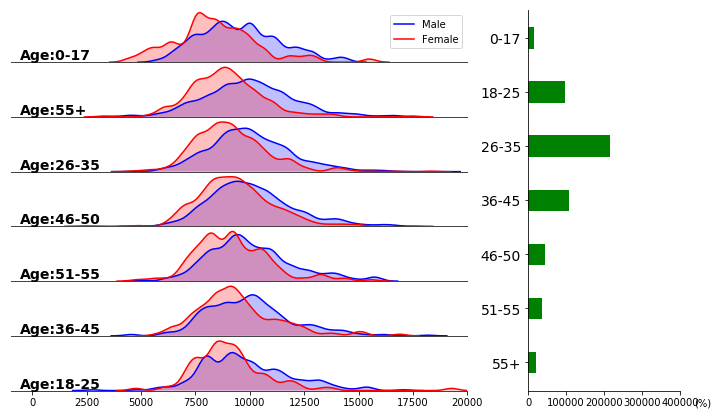

In [93]:

from matplotlib import gridspec
import matplotlib.pyplot as plt
import seaborn as sns

freq=[df['Age'].value_counts().reindex(index=age_list)[i] for i in range(7)]

number_gp=7
age_list=df['Age'].unique()
age_list.sort()

def ax_settings(ax, var_name, x_min, x_max):
  ax.set_xlim(x_min, x_max)
  ax.set_yticks([])
  
  ax.spines['left'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  
  ax.spines['bottom'].set_edgecolor('#444444')
  ax.spines['bottom'].set_linewidth(1)
  
  ax.text(0.02, 0.05, var_name, fontsize=14, fontweight='bold', transform=ax.transAxes)
  return None

fig=plt.figure(figsize=(12,7))
gs=gridspec.GridSpec(nrows=number_gp,
                    ncols=2,
                    figure=fig,
                    width_ratios=[3,1],
                    height_ratios=[1]*number_gp,
                    wspace=0.2, hspace=0.05,
                    )

ax=[None]*(number_gp+1)
feature=age_list

for i in range(7):
  ax[i]=fig.add_subplot(gs[i,0])
  
  ax_settings(ax[i], 'Age:'+str(features[i]), -1000, 20000)  ##pre-defined function
  sns.kdeplot(data=df_gp[(df_gp['Age']==feature[i]) & (df_gp['Gender']=='M')].Purchase,
              axes=ax[i],
              shade=True,
              color='blue',
              bw=300,
              legend=False,
             )
  sns.kdeplot(data=df_gp[(df_gp['Age']==feature[i]) & (df_gp['Gender']=='F')].Purchase,
              axes=ax[i],
              shade=True,
              color='red',
              bw=300,
              legend=False,
             )
  if i< 6:
    ax[i].set_xticks([])
    
    
ax[0].legend(['Male', 'Female'],)# facecolor='w')    


ax_7=fig.add_subplot(gs[:,1])
ax_7.spines['right'].set_visible(False)
ax_7.spines['top'].set_visible(False)

ax_7.barh(feature, freq, color='green', height=0.4,)
ax_7.set_xlim(0,400000)
ax_7.invert_yaxis()
ax_7.text(1.09, -0.04, '(%)', fontsize=10, 
          transform=ax_7.transAxes)
ax_7.tick_params(axis='y', labelsize=14)


    

plt.show()
  